In [4]:
#pip install pandas-profiling==3.6.2

In [91]:
from tcrdist.repertoire import TCRrep
from tcrdist.plotting import plot_pairings, _write_svg
import pandas as pd
from tcrdist.repertoire import TCRrep
from sklearn.preprocessing import StandardScaler

In [92]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [93]:
df_copy= pd.read_csv('vdjdb.txt',sep='\t')

profile=ProfileReport(df,title='data report')

In [94]:
df_copy.head()

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4           2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope antigen.gene  \
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
3  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
4  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   

  antigen.species   reference.id  \
0           HIV-1  PMID:15596521   
1           HIV-1  PMID:15596521   
2           HIV-1  PMID:15596521   
3           HIV-1  PMID:15596521   
4           HIV-1  PMID:15596521   

                                              method  \
0  {"frequency": "", "identification": "tetramer-...   
1  {"frequency": "", "identification": "tetramer-...   
2  {"frequency": "", "identification": "tetramer-...   
3  {"frequency": "", "identification": "tetramer-...   
4  {"frequency": "", "identification": "tetramer-...   

                                                meta  \
0  {"cell.subset": "CD8+", "clone.id": "", "donor...   
1  {"cell.subset": "CD8+", "clone.id": "", "donor...   
2  {"cell.subset": "CD8+", "clone.id": "", "donor...   
3  {"cell.subset": "CD8+", "clone.id": "", "donor...   
4  {"cell.subset": "CD8+", "clone.id": "", "donor...   

                                             cdr3fix  vdjdb.score web.method  \
0  {"cdr3": "CIVRAPGRADMRF", "cdr3_old": "CIVRAPG...            2       sort   
1  {"cdr3": "CASSYLPGQGDHYSNQPQHF", "cdr3_old": "...            2       sort   
2  {"cdr3": "CASSFEAGQGFFSNQPQHF", "cdr3_old": "C...            2       sort   
3  {"cdr3": "CAVPSGAGSYQLTF", "cdr3_old": "CAVPSG...            2       sort   
4  {"cdr3": "CASSFEPGQGFYSNQPQHF", "cdr3_old": "C...            2       sort   

  web.method.seq web.cdr3fix.nc web.cdr3fix.unmp  
0         sanger             no               no  
1         sanger             no               no  
2         sanger             no               no  
3         sanger             no               no  
4         sanger             no               no

In [95]:
len(df_copy)

92771

In [96]:
#df1=df[['antigen.epitope','antigen.gene','antigen.species']]

proof reference for the making the HIV and HIV-1 and HIV1 are the same 
 - https://www.aidsmap.com/about-hiv/hiv-1-and-hiv-2#:~:text=HIV%2D1%20comprises%20groups%20M,2%20subtypes%2C%20A%20and%20B.&text=Due%20to%20the%20genetic%20difference,not%20reliably%20detect%20HIV%2D2.
 - https://www.frontiersin.org/articles/10.3389/fimmu.2019.02820/full(Using random forest)

In [97]:
df1=df_copy[df_copy['vdjdb.score'].isin([2, 3,1])]

In [98]:
len(df1)

12414

In [99]:
df1 = df1.drop(['reference.id', 'method', 'meta','cdr3fix'], axis=1)

In [100]:
df1['antigen.species'].unique()

array(['HIV-1', 'TriticumAestivum', 'SARS-CoV-2', 'HomoSapiens', 'CMV',
       'M.tuberculosis', 'EBV', 'HTLV-1', 'GallusGallus', 'MusMusculus',
       'InfluenzaA', 'Synthetic', 'VSV', 'SaccharomycesCerevisiae',
       'ManducaSexta', 'HCV', 'synthetic', 'E.Coli', 'HHV', 'LCMV',
       'DENV1', 'DENV3/4', 'PlasmodiumBerghei',
       'SelaginellaMoellendorffii', 'PseudomonasFluorescens',
       'PseudomonasAeruginosa', 'HIV1', 'Homo sapiens', 'YFV', 'RSV',
       'HSV-2', 'DENV2', 'HPV-16', 'MCMV', 'MCPyV', 'Wheat', 'SIV', 'HIV'],
      dtype=object)

df2=df.copy()
for i in range(0,len(df1)):
    j=df2['antigen.species'][i]
    if j == 'HIV1' or j=='HIV':
        df2['antigen.species'][i]='HIV-1'

Since the there only 2 distint values in "Gene" variable, we will be implementing 1 hot encoding  

In [187]:
df2.columns

NameError: name 'df2' is not defined

In [ ]:
cdr_sequence=pd.DataFrame()

In [ ]:
cdr_sequence=df2['cdr3']

In [188]:
amino_acids = [cdr_sequence[i:i+3] for i in range(0, len(cdr_sequence), 3)]

NameError: name 'cdr_sequence' is not defined

In [ ]:
cdr_sequence.join(amino_acids)

In [189]:
Encoded_df= pd.get_dummies(df2,dtype='int',columns=['gene', 'species'])

NameError: name 'df2' is not defined

In [190]:
Encoded_df

NameError: name 'Encoded_df' is not defined

In [79]:
import numpy as np

# Define the amino acid alphabet
amino_acid_alphabet = 'ACDEFGHIKLMNPQRSTVWY'

def cdr_to_one_hot(cdr_sequence):
    one_hot_encoding = np.zeros((len(cdr_sequence), len(amino_acid_alphabet)))

    for i, amino_acid in enumerate(cdr_sequence):
        #print(i,amino_acid)
        if amino_acid in amino_acid_alphabet:
            index = amino_acid_alphabet.index(amino_acid)
            one_hot_encoding[i, index] = 1

    return one_hot_encoding

# Example CDR sequence
cdr_sequence = "CASSYLPGQGDHYSNQPQHF"

# Convert CDR sequence to one-hot representation
one_hot_representation = cdr_to_one_hot(cdr_sequence)

# Display the result
print("CDR Sequence:", cdr_sequence)
print("One-Hot Representation:")
print(one_hot_representation)

CDR Sequence: CASSYLPGQGDHYSNQPQHF
One-Hot Representation:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

### Similarity Distance

In [101]:
df=df_copy.copy()

In [102]:
df.isna().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

In [103]:
df=df.dropna()
print(len(df))
df=df[df['vdjdb.score']!=0]

90071


In [104]:
len(df)

12042

In [105]:
df1 = df.drop(['reference.id', 'method', 'meta','cdr3fix','vdjdb.score','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1)

In [106]:
df_aa= df1[df1['gene']=='TRA']
df_bb= df1[df1['gene']=='TRB']

## Alpha Chain

In [19]:
df_alpha=df_aa.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [20]:
df_alpha = df_alpha.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [21]:
len(df_alpha)

3653

In [22]:
df_alpha=df_alpha.drop_duplicates()
df_alpha

cdr3_a_aa         v_a_gene   j_a_gene      subject  \
0          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
3         CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
7          CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
9          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
12        CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
...                  ...              ...        ...          ...   
92681         CIALNARLMF      TRAV26-1*01  TRAJ31*01  HomoSapiens   
92683   CAMREGRYSSASKIIF    TRAV14/DV4*01   TRAJ3*01  HomoSapiens   
92685   CLVGDGDGGATNKLIF         TRAV4*01  TRAJ32*01  HomoSapiens   
92689  CAASVLYGSSNTGKLIF    TRAV29/DV5*01  TRAJ37*01  HomoSapiens   
92767       CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01  HomoSapiens   

             epitope  
0           FLKEKGGL  
3           FLKEKGGL  
7           FLKEKGGL  
9           FLKEQGGL  
12          FLKEQGGL  
...              ...  
92681   PQPELPYPQPQL  
92683   FPQPEQPFPWQP  
92685   FPQPEQPFPWQP  
92689   QLQPFPQPELPY  
92767  PQQPFPQPEQPFP  

[2421 rows x 5 columns]

### Mouse

In [23]:
df_am=df_alpha[df_alpha['subject']=='MusMusculus']
df_am=df_am.drop(['subject'], axis=1)
print(len(df_am))

640


In [24]:
tr_am = TCRrep(cell_df = df_am,
            organism = 'mouse',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_am.pw_alpha
tr_am.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 

tr_am.compute_distances()
tr_am.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 27, 25, ..., 40, 40, 23],
       [27,  0, 22, ..., 13, 13, 33],
       [25, 22,  0, ..., 37, 39, 27],
       ...,
       [40, 13, 37, ...,  0,  4, 37],
       [40, 13, 39, ...,  4,  0, 39],
       [23, 33, 27, ..., 37, 39,  0]], dtype=int16)

In [30]:
Alpha_mouse_vector = pd.DataFrame(tr_am.pw_cdr3_a_aa)
#Alpha_mouse_vector.to_csv('Alpha_mouse_vector.csv')

In [60]:
df1 = df_am.reset_index(drop=True)
df2 = Alpha_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_mouse_vector.csv')

In [88]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_am.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [89]:
l=df_am['epitope'].tolist()
embedding_df['epitope']=l

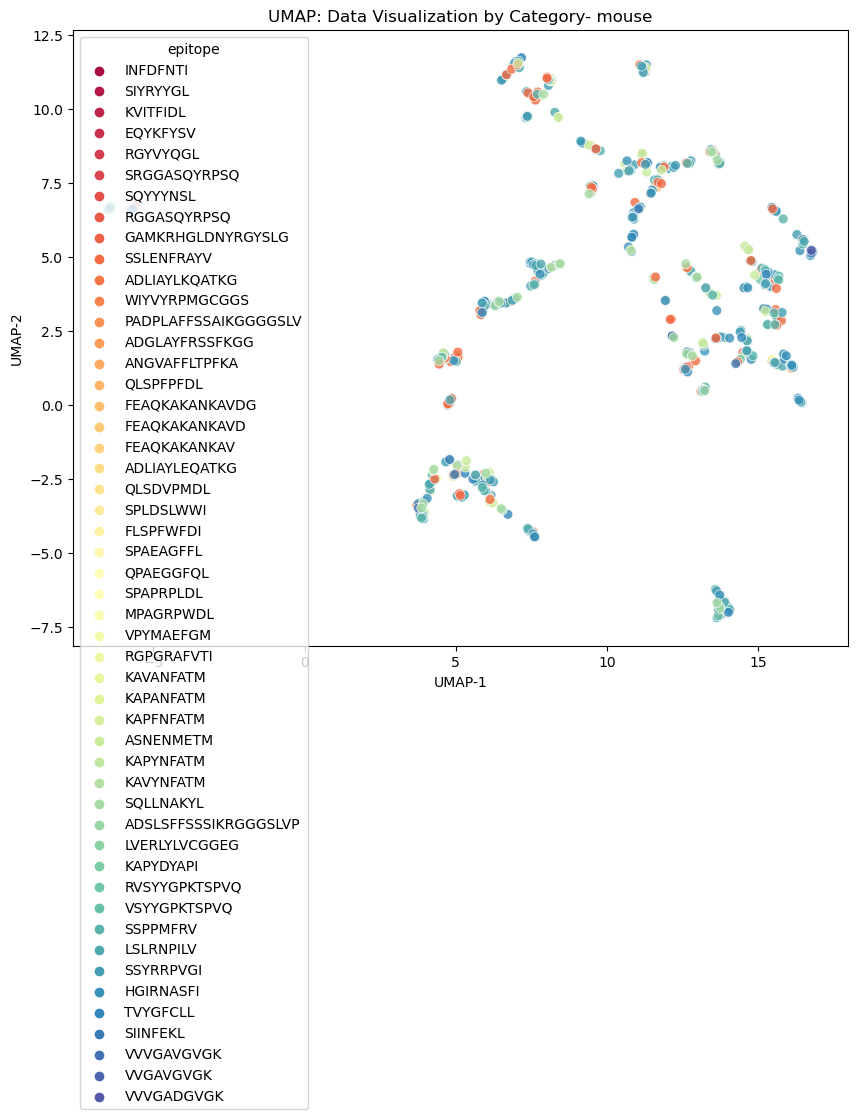

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- mouse')
plt.show()

np.savetxt('Alpha_mouse.csv',tr_am.pw_cdr3_a_aa,delimiter=',',fmt='%d')

### Human

In [31]:
df_ah=df_alpha[df_alpha['subject']=='HomoSapiens']
#df_ah=df_h.drop(['subject'], axis=1)

In [32]:
len(df_ah)

1781

In [33]:
tr_ah = TCRrep(cell_df = df_ah,
            organism = 'human',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_ah.pw_alpha
tr_ah.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 
tr_ah.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable 

array([[ 0, 30, 30, ..., 33, 28, 36],
       [30,  0,  0, ..., 31, 32, 35],
       [30,  0,  0, ..., 31, 32, 35],
       ...,
       [33, 31, 31, ...,  0, 32, 19],
       [28, 32, 32, ..., 32,  0, 35],
       [36, 35, 35, ..., 19, 35,  0]], dtype=int16)

In [34]:
Alpha_human_vector = pd.DataFrame(tr_ah.pw_cdr3_a_aa)
#Alpha_human_vector.to_csv('Alpha_human_vector.csv')

In [61]:
df1 = df_ah.reset_index(drop=True)
df2 = Alpha_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


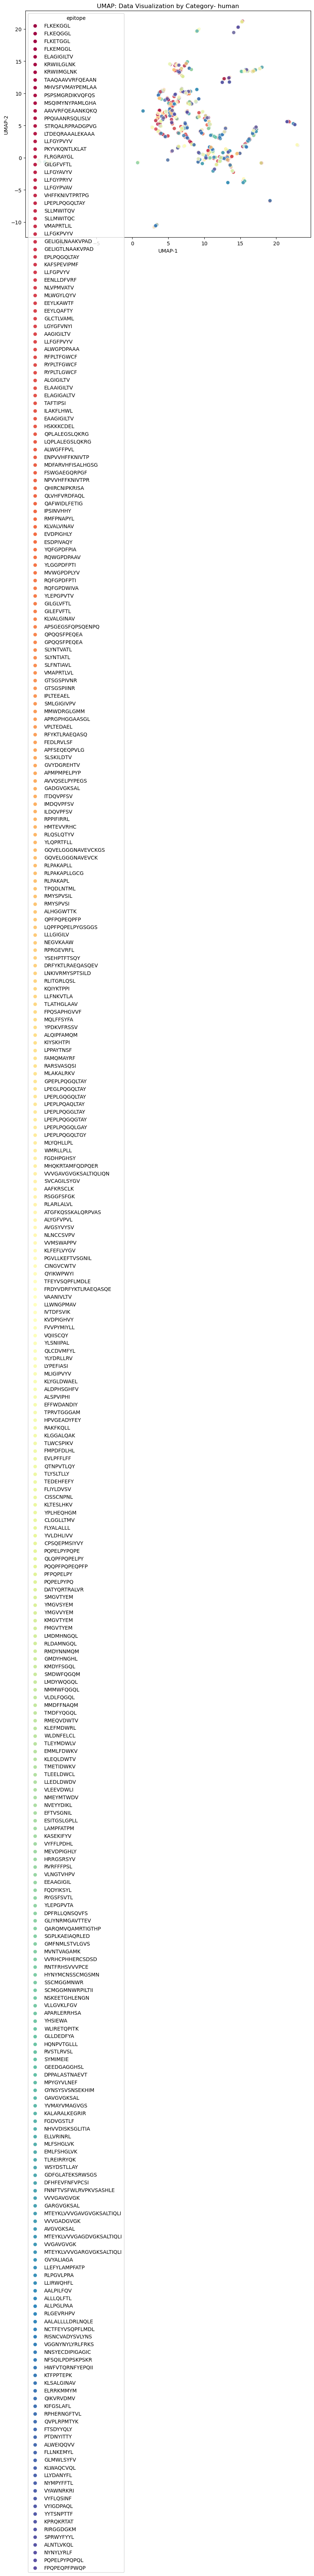

In [119]:
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_ah.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [95]:
l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

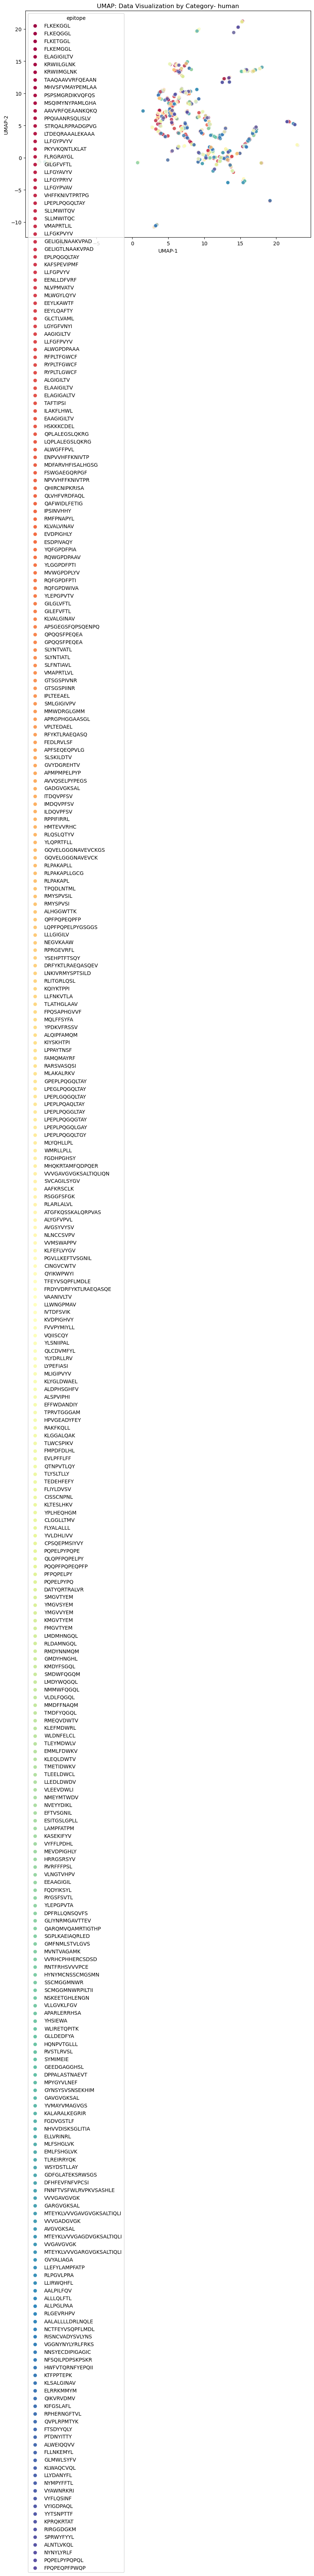

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [313]:
np.savetxt('Alpha_human.csv',tr_ah.pw_cdr3_a_aa,delimiter=',',fmt='%d')

## Beta Chain

In [35]:
df_bb=df_bb.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_b_gene','j.segm': 'j_b_gene','cdr3': 'cdr3_b_aa','species':'subject'})

In [36]:
df_Beta = df_bb.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [37]:
len(df_bb)

8389

### Mouse

In [62]:
df_bm=df_Beta[df_Beta['subject']=='MusMusculus']
df_bm=df_bm.drop(['subject'], axis=1)
df_bm = df_bm.groupby(list(df_bm.columns)).size().reset_index(name='count')

In [63]:
tr_bm = TCRrep(cell_df = df_bm,
            organism = 'mouse',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm.pw_beta
tr_bm.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 32, 25, ..., 47, 47, 31],
       [32,  0, 24, ..., 35, 31, 31],
       [25, 24,  0, ..., 39, 39, 34],
       ...,
       [47, 35, 39, ...,  0,  5, 35],
       [47, 31, 39, ...,  5,  0, 35],
       [31, 31, 34, ..., 35, 35,  0]], dtype=int16)

In [64]:
Beta_mouse_vector = pd.DataFrame(tr_bm.pw_cdr3_b_aa)
#Beta_mouse_vector.to_csv('Beta_mouse_vector.csv')

In [65]:
#tr_bm.clone_df

In [66]:
df1 = df_bm.reset_index(drop=True)
df2 = Beta_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_mouse_vector.csv')

In [204]:
print(tr_bm.pw_cdr3_b_aa.shape)
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
len(embedding)

(745, 745)


C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


745

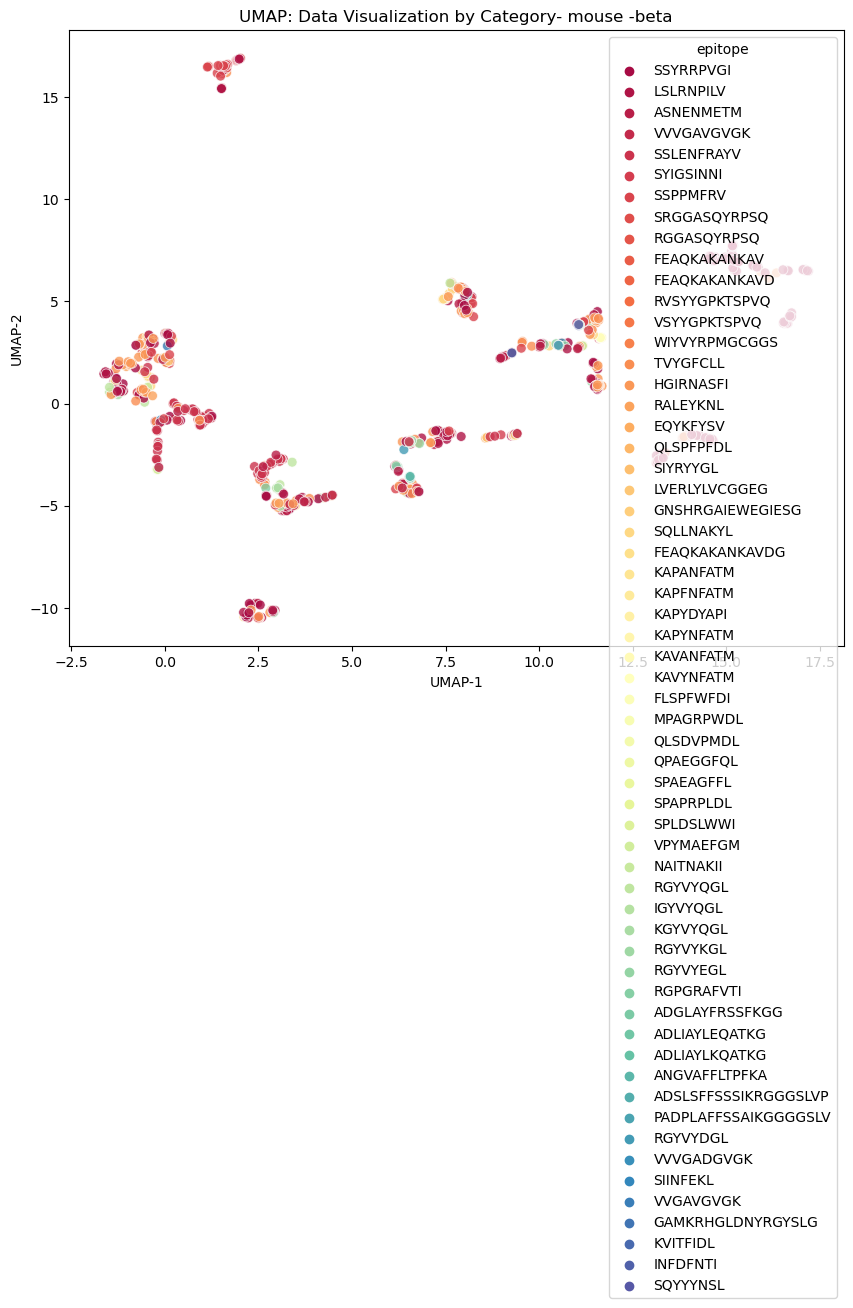

In [129]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- mouse -beta')
plt.show()

In [314]:
np.savetxt('Beta_mouse.csv',tr_bm.pw_cdr3_b_aa,delimiter=',',fmt='%d')

### Human

In [67]:
df_bh=df_Beta[df_Beta['subject']=='HomoSapiens']
print(len(df_bh))
df_bh=df_bh.drop(['subject'], axis=1)
df_bh = df_bh.groupby(list(df_bh.columns)).size().reset_index(name='count')

6539


In [68]:
tr_bh = TCRrep(cell_df = df_bh,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh.pw_beta
tr_bh.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 38, 36, ..., 40, 34, 33],
       [38,  0, 23, ..., 40, 32, 36],
       [36, 23,  0, ..., 52, 36, 26],
       ...,
       [40, 40, 52, ...,  0, 35, 47],
       [34, 32, 36, ..., 35,  0, 32],
       [33, 36, 26, ..., 47, 32,  0]], dtype=int16)

In [69]:
Beta_human_vector = pd.DataFrame(tr_bh.pw_cdr3_b_aa)
#Beta_human_vector.to_csv('Beta_human_vector.csv')

In [70]:
df1 = df_bh.reset_index(drop=True)
df2 = Beta_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


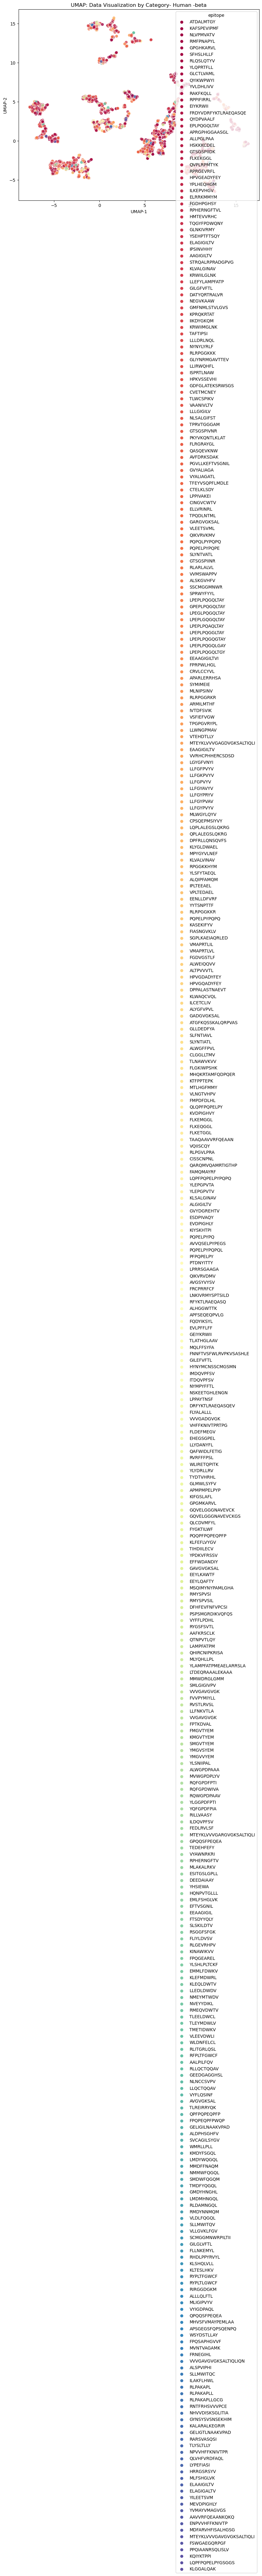

In [135]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bh.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Human -beta')
plt.show()

### Alpha and Beta Chain

In [107]:
df_a_b = df1.loc[(df1['complex.id']!=0)]
df_a_b=df_a_b.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [108]:
len(df_a_b)

5623

In [109]:
df_a_b = df_a_b.drop([ 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [110]:
df_paired_alpha=df_a_b.loc[df_a_b.gene=='TRA']
df_paired_beta=df_a_b.loc[df_a_b.gene=='TRB']

In [111]:
df_paired_ab=pd.merge(df_paired_alpha, df_paired_beta, on='complex.id', how='outer')
df_paired_ab1=df_paired_ab.dropna()
df_paired_ab1 = df_paired_ab1.drop([ 'gene_x','subject_x','epitope_x','gene_y','complex.id'], axis=1)
df_paired_ab1=df_paired_ab1.rename(columns={'cdr3_a_aa_x':'cdr3_a_aa','cdr3_a_aa_y':'cdr3_b_aa','v_a_gene_x': 'v_a_gene', 'j_a_gene_x': 'j_a_gene','v_a_gene_y': 'v_b_gene','cdr3': 'cdr3_a_aa','j_a_gene_y':'j_b_gene','epitope_y':'epitope'})

### Mouse

In [73]:
df_ab_bm=df_paired_ab1 [df_paired_ab1 ['subject_y']=='MusMusculus']
df_ab_bm=df_ab_bm.drop(['subject_y'], axis=1)
df_ab_bm = df_ab_bm.groupby(list(df_ab_bm.columns)).size().reset_index(name='count')

tr_bm_ab = TCRrep(cell_df = df_ab_bm,
            organism = 'mouse',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm_ab.pw_beta
tr_bm_ab.pw_cdr3_b_aa
tr_bm_ab.pw_alpha
tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 24, ..., 36, 36, 23],
       [24,  0, 20, ..., 12, 12, 30],
       [24, 20,  0, ..., 34, 36, 26],
       ...,
       [36, 12, 34, ...,  0,  4, 33],
       [36, 12, 36, ...,  4,  0, 35],
       [23, 30, 26, ..., 33, 35,  0]], dtype=int16)

In [74]:
human_paired=tr_bm_ab.pw_beta+tr_bm_ab.pw_alpha
human_paired

array([[  0, 247, 244, ..., 299, 299, 203],
       [247,   0, 111, ..., 243, 107, 293],
       [244, 111,   0, ..., 304, 162, 276],
       ...,
       [299, 243, 304, ...,   0, 163, 240],
       [299, 107, 162, ..., 163,   0, 252],
       [203, 293, 276, ..., 240, 252,   0]], dtype=int16)

In [75]:
paired_vector = pd.DataFrame(human_paired)
#paired_vector.to_csv('Paired_vector.csv')

In [76]:
df1 = df_ab_bm.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_mouse.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


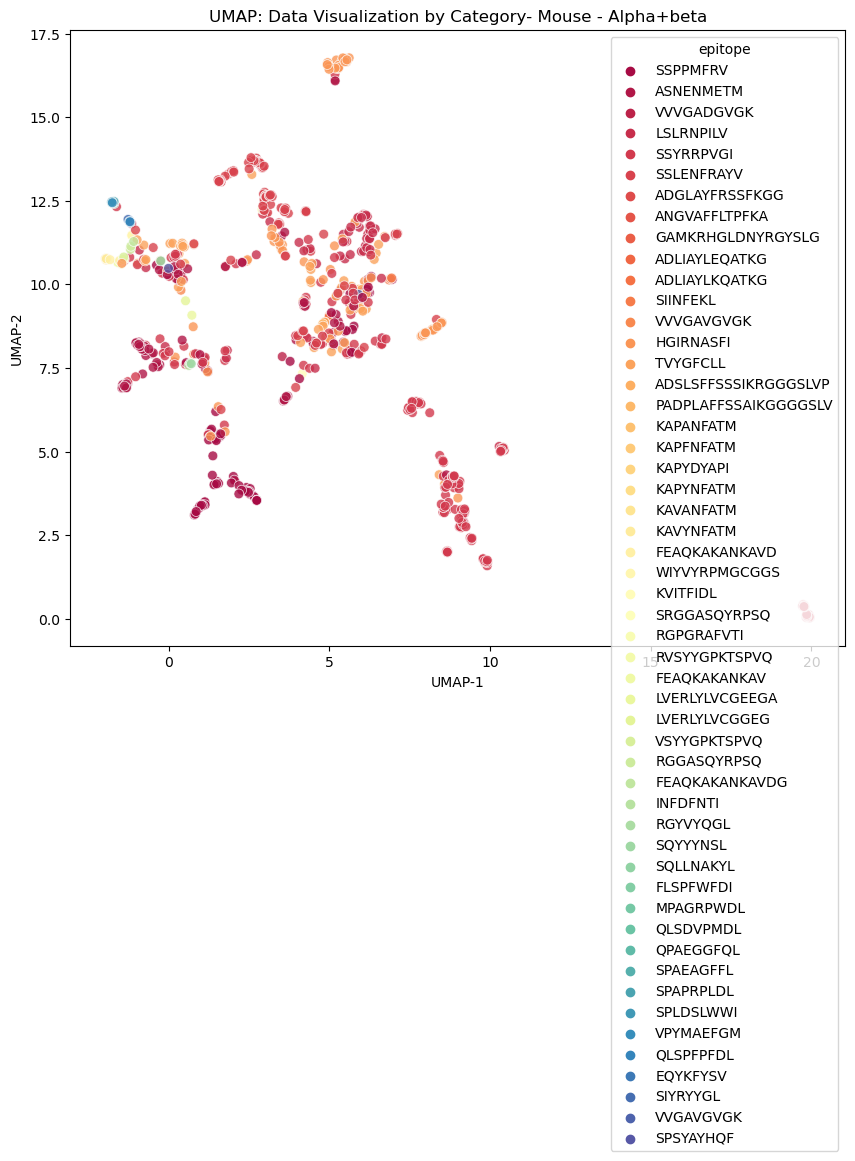

In [173]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Mouse - Alpha+beta')
plt.show()

### Human

In [121]:
df_ab_bh=df_paired_ab1 [df_paired_ab1 ['subject_y']=='HomoSapiens']
#print(df_ab_bh)
df_ab_bh=df_ab_bh.drop(['subject_y'], axis=1)
df_ab_bh = df_ab_bh.groupby(list(df_ab_bh.columns)).size().reset_index(name='count')
print(len(df_ab_bh))
#print(df_ab_bh.head())

tr_bh_ab = TCRrep(cell_df = df_ab_bh,
            organism = 'human',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh_ab.pw_beta
tr_bh_ab.pw_cdr3_b_aa
tr_bh_ab.pw_alpha
tr_bh_ab.pw_cdr3_a_aa

1462


C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 32, ..., 33, 28, 36],
       [24,  0, 24, ..., 25, 30, 31],
       [32, 24,  0, ..., 24, 25, 26],
       ...,
       [33, 25, 24, ...,  0, 32, 19],
       [28, 30, 25, ..., 32,  0, 35],
       [36, 31, 26, ..., 19, 35,  0]], dtype=int16)

In [122]:
df_ab_bh

cdr3_a_aa     v_a_gene   j_a_gene          cdr3_b_aa  \
0          CAAAASGGSYIPTF   TRAV1-2*01   TRAJ6*01     CASGTGDSNQPQHF   
1           CAAAMDSSYKLIF  TRAV12-2*01  TRAJ12*01       CASSDPGTEAFF   
2            CAADNQGGKLIF     TRAV5*01  TRAJ23*01      CASSGRSADTQYF   
3            CAADNQGGKLIF     TRAV5*01  TRAJ23*01      CASSGRSADTQYF   
4     CAADTLLNAGGTSYGKLTF  TRAV13-1*01  TRAJ52*01    CASSGRGFLNYGYTF   
...                   ...          ...        ...                ...   
1457         CWSPFGNEKLTF   TRAV8-2*01  TRAJ48*01     CASSLGQGSYEQYF   
1458        CWSPNQAGTALIF    TRAV10*01  TRAJ15*01    CAISRDTRRGQPQHF   
1459           FYTGGFKTIF     TRAV6*01   TRAJ9*01      CASRSSGEYEQYF   
1460       GVWPARGRGVKIIF    TRAV19*01   TRAJ3*01  CSARDQGGTGVLDTQYF   
1461             SSGNQFYF    TRAV21*01  TRAJ49*01    CASSQQTGTIGGYTF   

         v_b_gene    j_b_gene        epitope  count  
0     TRBV12-5*01  TRBJ1-5*01    EPLPQGQLTAY      1  
1     TRBV10-2*01  TRBJ1-1*01     GADGVGKSAL      1  
2       TRBV19*01  TRBJ2-3*01      GILGFVFTL      2  
3       TRBV19*02  TRBJ2-3*01      GILGFVFTL      2  
4      TRBV5-6*01  TRBJ1-2*01      NLVPMVATV      2  
...           ...         ...            ...    ...  
1457  TRBV11-2*01  TRBJ2-7*01     GTSGSPIVNR      1  
1458  TRBV10-3*01  TRBJ1-5*01  LLEFYLAMPFATP      1  
1459    TRBV19*01  TRBJ2-7*01      YLQPRTFLL      1  
1460  TRBV20-1*01  TRBJ2-3*01      QYIKWPWYI      1  
1461   TRBV6-5*01  TRBJ1-2*01      NLVPMVATV      1  

[1462 rows x 8 columns]

In [123]:
human_paired=tr_bh_ab.pw_beta+tr_bh_ab.pw_alpha
human_paired

array([[  0, 294, 295, ..., 315, 328, 341],
       [294,   0, 243, ..., 255, 323, 278],
       [295, 243,   0, ..., 210, 303, 277],
       ...,
       [315, 255, 210, ...,   0, 330, 275],
       [328, 323, 303, ..., 330,   0, 320],
       [341, 278, 277, ..., 275, 320,   0]], dtype=int16)

In [124]:
len(human_paired)

1462

In [125]:
paired_vector = pd.DataFrame(human_paired)

In [126]:
df1 = df_ab_bh.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_human.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


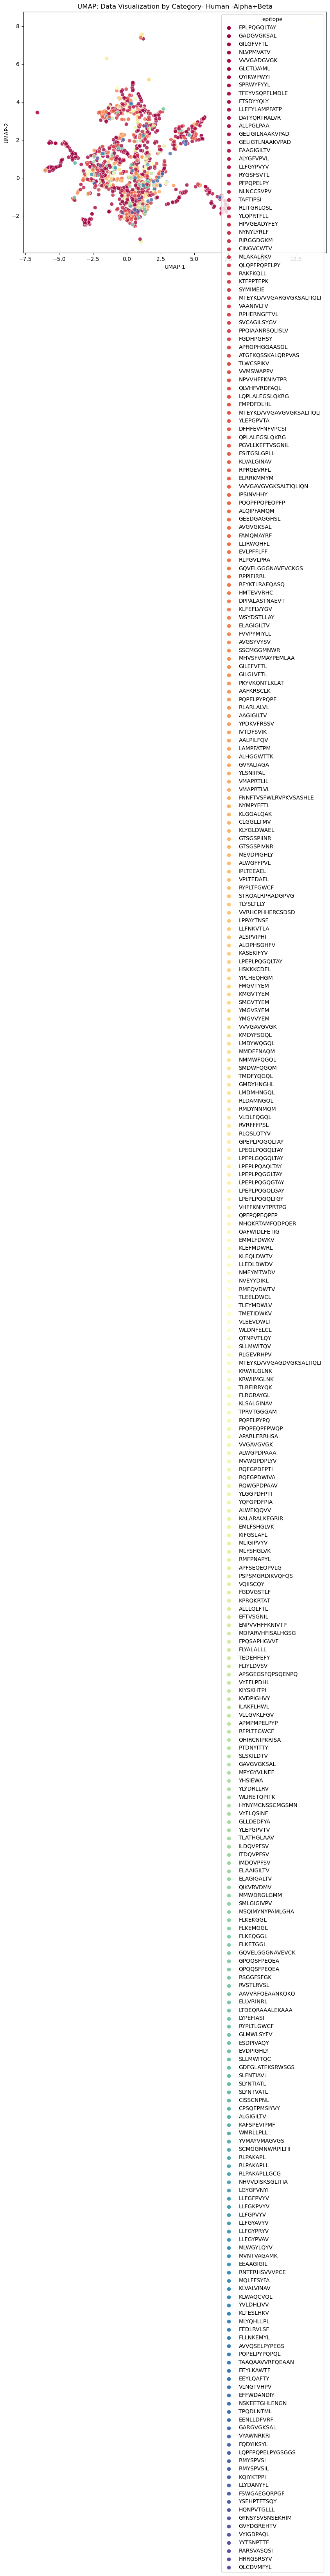

In [127]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Human -Alpha+Beta')
plt.show()

### euclidean distance for clusters found 

In [ ]:
import numpy as np

def get_vector(word):
    try:
        return model[word]
    except KeyError:
        return np.zeros(model.vector_size)  # Return zero vector if word not in vocabulary

def compute_euclidean(v1, v2):
    return np.linalg.norm(v1 - v2)

In [ ]:
def encode_sequence(sequence, blosum_matrix):
    encoded_seq = []
    for acid in sequence:
        encoded_seq.append(blosum_matrix[acid])
    return encoded_seq

bl62={'A':[4,-1,-2,-2,0,-1,-1,0,-2,-1,-1,-1,-1,-2,-1,1,0,-3,-2,0],
      'R':[-1,4,0,-2,-3,1,0,-2,0,-3,-2,2,-1,-3,-2,-1,-1,-3,-2,-3],
      'N':[-2,0,4,1,-3,0,0,0,1,-3,-3,0,-2,-3,-2,1,0,-4,-2,-3],
      'D':[-2,-2,1,4,-3,0,2,-1,-1,-3,-4,-1,-3,-3,-1,0,-1,-4,-3,-3],
      'C':[0,-3,-3,-3,4,-3,-4,-3,-3,-1,-1,-3,-1,-2,-3,-1,-1,-2,-2,-1],
      'Q':[-1,1,0,0,-3,4,2,-2,0,-3,-2,1,0,-3,-1,0,-1,-2,-1,-2],
      'E':[-1,0,0,2,-4,2,4,-2,0,-3,-3,1,-2,-3,-1,0,-1,-3,-2,-2],
      'G':[0,-2,0,-1,-3,-2,-2,4,-2,-4,-4,-2,-3,-3,-2,0,-2,-2,-3,-3],
      'H':[-2,0,1,-1,-3,0,0,-2,4,-3,-3,-1,-2,-1,-2,-1,-2,-2,2,-3],
      'I':[-1,-3,-3,-3,-1,-3,-3,-4,-3,4,2,-3,1,0,-3,-2,-1,-3,-1,3],
      'L':[-1,-2,-3,-4,-1,-2,-3,-4,-3,2,4,-2,2,0,-3,-2,-1,-2,-1,1],
      'K':[-1,2,0,-1,-3,1,1,-2,-1,-3,-2,4,-1,-3,-1,0,-1,-3,-2,-2],
      'M':[-1,-1,-2,-3,-1,0,-2,-3,-2,1,2,-1,4,0,-2,-1,-1,-1,-1,1],
      'F':[-2,-3,-3,-3,-2,-3,-3,-3,-1,0,0,-3,0,4,-4,-2,-2,1,3,-1],
      'P':[-1,-2,-2,-1,-3,-1,-1,-2,-2,-3,-3,-1,-2,-4,4,-1,-1,-4,-3,-2],
      'S':[1,-1,1,0,-1,0,0,0,-1,-2,-2,0,-1,-2,-1,4,1,-3,-2,-2],
      'T':[0,-1,0,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-2,-1,1,4,-2,-2,0],
      'W':[-3,-3,-4,-4,-2,-2,-3,-2,-2,-3,-2,-3,-1,1,-4,-3,-2,4,2,-3],
      'Y':[-2,-2,-2,-3,-2,-1,-2,-3,2,-1,-1,-2,-1,3,-3,-2,-2,2,4,-1],
      'V':[0,-3,-3,-3,-1,-2,-2,-3,-3,3,1,-2,1,-1,-2,-2,0,-3,-1,4]}


print(encode_sequence(sequence="CAISEYPPTGRKADTQYF", blosum_matrix=bl62))

In [128]:
l

['EPLPQGQLTAY',
 'GADGVGKSAL',
 'GILGFVFTL',
 'GILGFVFTL',
 'NLVPMVATV',
 'VVVGADGVGK',
 'NLVPMVATV',
 'NLVPMVATV',
 'GLCTLVAML',
 'GILGFVFTL',
 'GILGFVFTL',
 'GILGFVFTL',
 'QYIKWPWYI',
 'SPRWYFYYL',
 'TFEYVSQPFLMDLE',
 'FTSDYYQLY',
 'NLVPMVATV',
 'GILGFVFTL',
 'LLEFYLAMPFATP',
 'NLVPMVATV',
 'SPRWYFYYL',
 'DATYQRTRALVR',
 'ALLPGLPAA',
 'GELIGILNAAKVPAD',
 'GELIGTLNAAKVPAD',
 'NLVPMVATV',
 'EAAGIGILTV',
 'TFEYVSQPFLMDLE',
 'TFEYVSQPFLMDLE',
 'SPRWYFYYL',
 'ALYGFVPVL',
 'EAAGIGILTV',
 'LLFGYPVYV',
 'LLFGYPVYV',
 'TFEYVSQPFLMDLE',
 'TFEYVSQPFLMDLE',
 'RYGSFSVTL',
 'NLVPMVATV',
 'NLVPMVATV',
 'PFPQPELPY',
 'NLNCCSVPV',
 'ALLPGLPAA',
 'NLVPMVATV',
 'NLVPMVATV',
 'GILGFVFTL',
 'GILGFVFTL',
 'GILGFVFTL',
 'GILGFVFTL',
 'TAFTIPSI',
 'RLITGRLQSL',
 'NLVPMVATV',
 'YLQPRTFLL',
 'YLQPRTFLL',
 'HPVGEADYFEY',
 'GILGFVFTL',
 'ALYGFVPVL',
 'NYNYLYRLF',
 'QYIKWPWYI',
 'QYIKWPWYI',
 'QYIKWPWYI',
 'RIRGGDGKM',
 'GILGFVFTL',
 'YLQPRTFLL',
 'PFPQPELPY',
 'CINGVCWTV',
 'MLAKALRKV',
 'NLVPMVATV',
 'QLQPFPQP

The BLOSUM62 matrix is typically used to score alignments between sequences of amino acids, which helps in determining the degree of similarity or evolutionary distance between proteins. It's a tool often used in bioinformatics for tasks such as sequence alignment in programs like BLAST.

To find the similarity score between two epitopes (short sequences of amino acids that are recognized by the immune system), you can certainly use the BLOSUM62 matrix. Each pair of amino acids in the aligned sequences is scored based on the BLOSUM62 matrix, and these scores are summed to provide an overall similarity score for the alignment.

Here’s a basic idea of how you can use BLOSUM62 for scoring:

1. **Alignment**: First, you need to align the two epitope sequences. This could be a simple alignment if the sequences are of similar length and composition, or may require more sophisticated methods if they are dissimilar or of different lengths.

2. **Scoring the Alignment**: Using the BLOSUM62 matrix, score each aligned pair of amino acids. The BLOSUM62 matrix gives a score for every possible pair of amino acids, based on their likelihood of substitution during evolutionary changes.

3. **Calculate Total Score**: Sum up the scores for all the pairs in the alignment to get the total similarity score.

If you have specific epitope sequences and you'd like to calculate the similarity score using BLOSUM62, I can help you with that calculation. Just provide the sequences and I can walk you through the process or do the 

pip install biopython
computation.

In [133]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
def calculate_similarity(epitope1, epitope2):
    # Load the BLOSUM62 matrix
    matrix = substitution_matrices.load("BLOSUM62")
    
    # Perform a global alignment using the BLOSUM62 matrix
    alignments = pairwise2.align.globaldx(epitope1, epitope2, matrix)
    
    # Select the best alignment (highest score)
    top_alignment = alignments[0]
    aligned_epitope1, aligned_epitope2, score, begin, end = top_alignment
    
    # Print the alignment and the similarity score
    print("Alignment 1: ", aligned_epitope1)
    print("Alignment 2: ", aligned_epitope2)
    print("Similarity Score: ", score)

In [138]:
# Example epitopes
epitope1 = "EPLPQGQLTAY"
epitope2 = "EAAGIGILTV"

# Calculate similarity
calculate_similarity(epitope1, epitope2)

Alignment 1:  EP---LPQGQ-LTAY-
Alignment 2:  E-AAGI--G-ILT--V
Similarity Score:  22.0


Result explaination:

1. **Alignment 1 and 2**: These are your two epitope sequences after alignment. Gaps are introduced (indicated by dashes "-") to maximize the alignment score based on the BLOSUM62 matrix. Each position in the alignment is either a matched pair of amino acids, a mismatch, or a gap in one of the sequences.
2. **Similarity Score**: This is the cumulative score of the aligned sequences. The score is calculated by adding up the individual scores for each pair of amino acids from the BLOSUM62 matrix. Matches, mismatches, and gaps all contribute to this score. The BLOSUM62 matrix assigns higher scores for more likely (conservative) substitutions and penalizes less likely (non-conservative) substitutions as well as gaps.

The score of 22.0 indicates that when the two sequences are optimally aligned (according to the rules of the BLOSUM62 matrix), the total score reflecting the similarity is 22. This score is a raw score, and whether it indicates a strong or weak similarity can depend on the length of the sequences and the typical scores seen for similar proteins. Higher scores generally indicate greater similarity or more conservative substitutions.ons.